# Predictive Modeling and Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings

In [2]:
#Remove Warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading csv
df=pd.read_csv("stocks.csv")

## Data Understanding

In [4]:
#displaying csv
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [5]:
#checking shape of dataset
df.shape

(248, 8)

In [6]:
#Displaying first 5 rows of data
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [7]:
#Displaying last 5 rows of data
df.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [8]:
#Display all statistical Info of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [9]:
#Display all statistical Info of data including categorical
df.describe(include="all")

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
unique,4,62,NaN,NaN,NaN,NaN,NaN,NaN
top,AAPL,2023-02-07,NaN,NaN,NaN,NaN,NaN,NaN
freq,62,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,NaN,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,NaN,NaN,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,NaN,NaN,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,NaN,NaN,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,NaN,NaN,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07


In [10]:
#display structural info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [11]:
#checking null values
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Feature Engineering

In [12]:
#Converting Date to dateTime format
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Feature Engineering: Adding Moving Averages & Volatility
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std()
df.dropna(inplace=True)  # Drop rows with NaN values due to rolling calculations

In [14]:
#Checking null value after rolling calculation
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Ticker        0.0
Date          0.0
Open          0.0
High          0.0
Low           0.0
Close         0.0
Adj Close     0.0
Volume        0.0
MA_7          0.0
MA_30         0.0
Volatility    0.0
dtype: float64


# Data Visualization

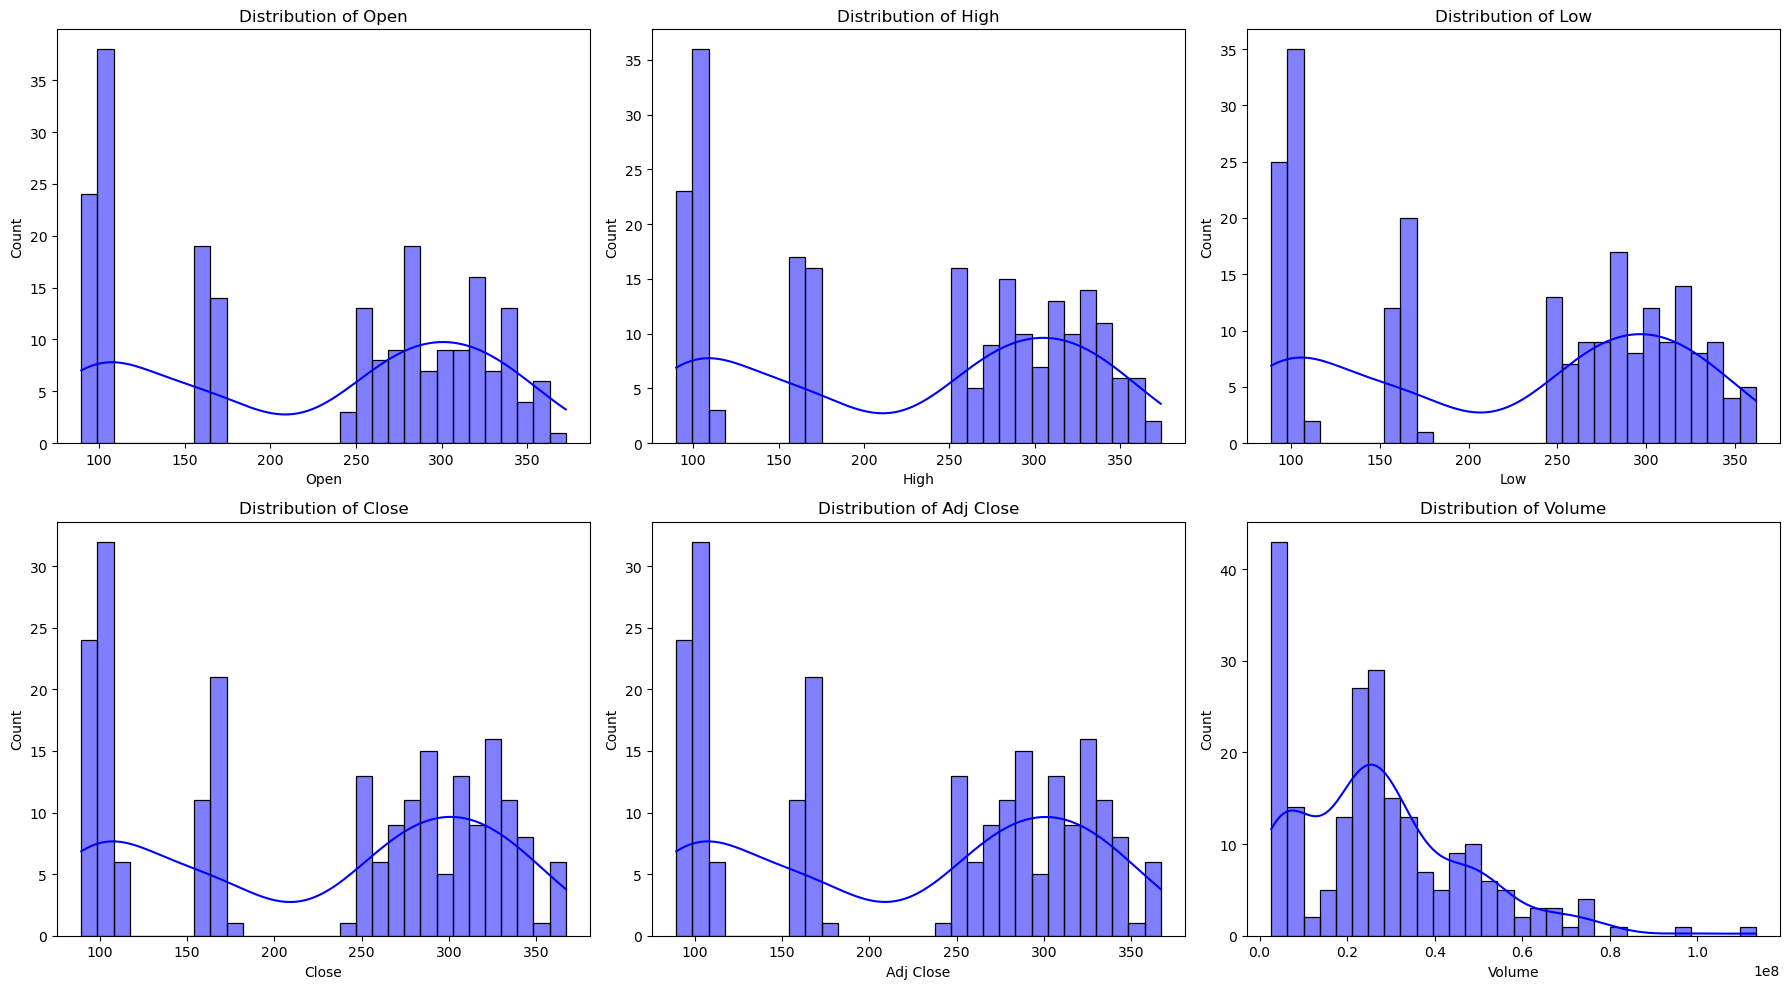

In [15]:
#Creating Hist plot with kde for checking data skewness
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flat, columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

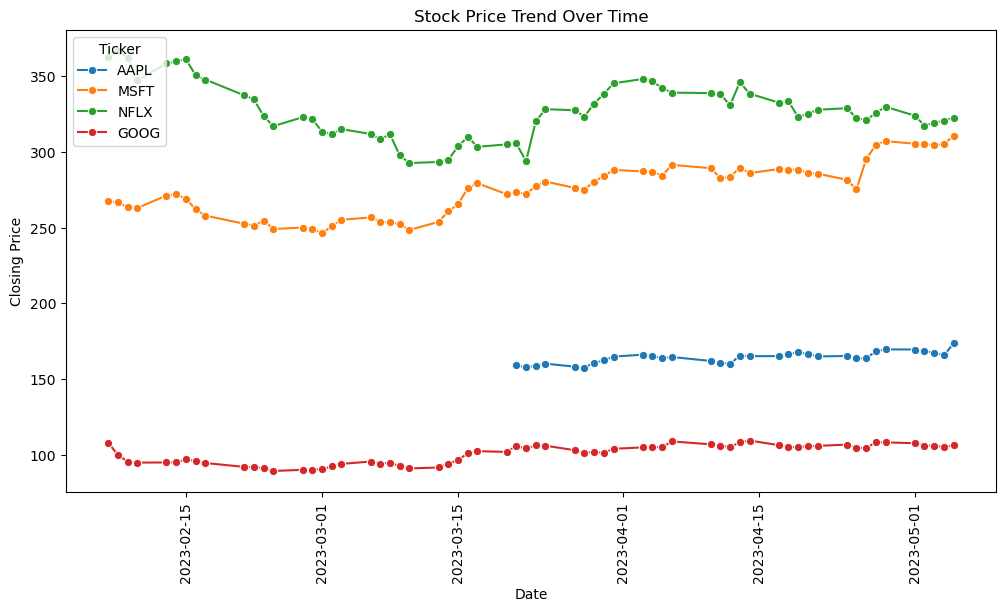

In [16]:
# Plot stock price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], hue=df["Ticker"], marker="o", linewidth=1.5)
plt.title("Stock Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=90)
plt.legend(title="Ticker", loc="upper left")
plt.show()


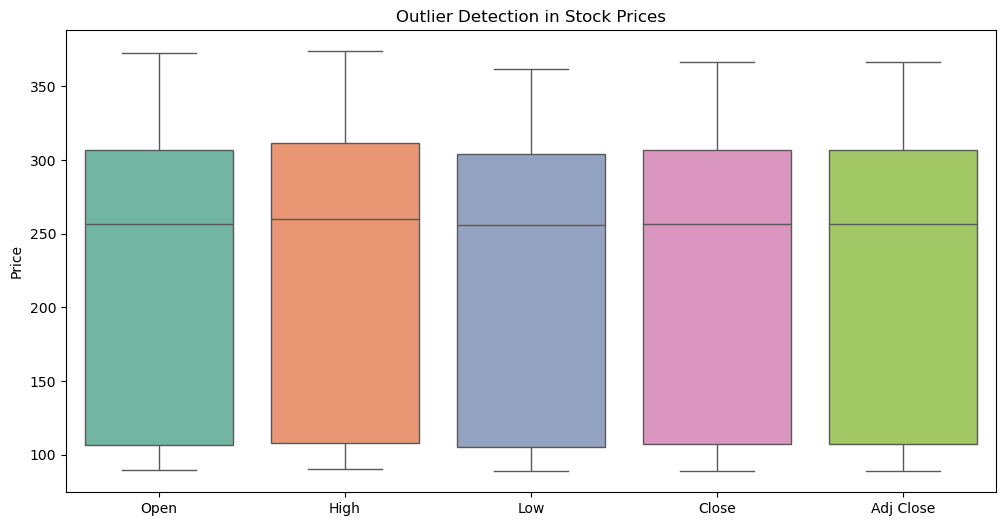

In [17]:
# Boxplot to detect outliers in stock prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']], palette="Set2")
plt.title("Outlier Detection in Stock Prices")
plt.ylabel("Price")
plt.show()

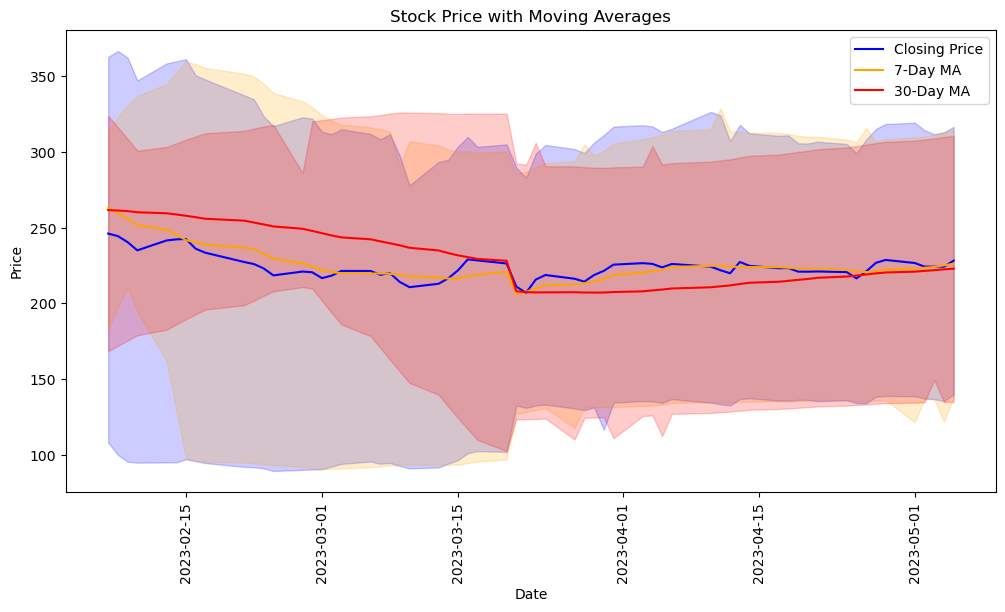

In [18]:
# Plot Moving Averages using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], label="Closing Price", color="blue")
sns.lineplot(x=df["Date"], y=df["MA_7"], label="7-Day MA", color="orange")
sns.lineplot(x=df["Date"], y=df["MA_30"], label="30-Day MA", color="red")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.legend()
plt.show()

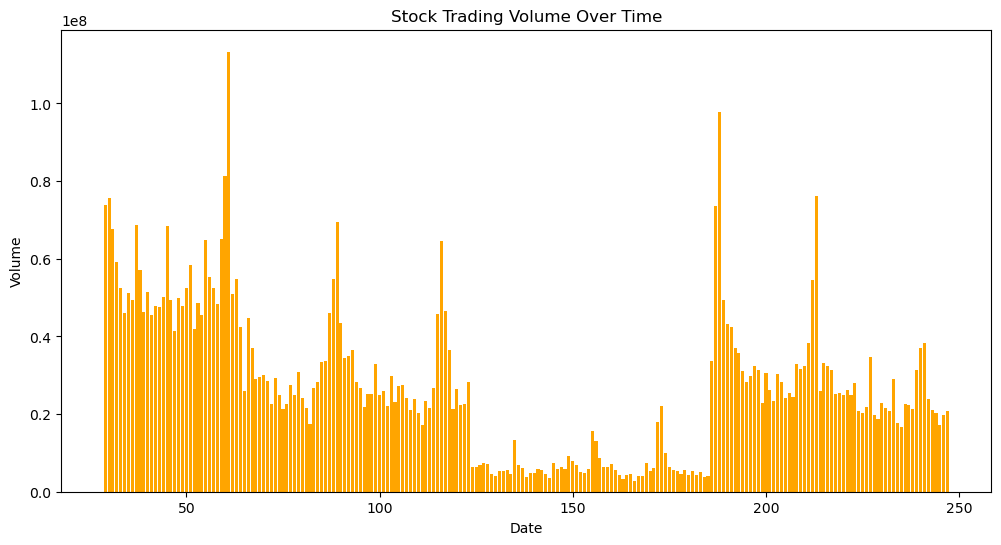

In [19]:
# Plot stock trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='orange')
plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

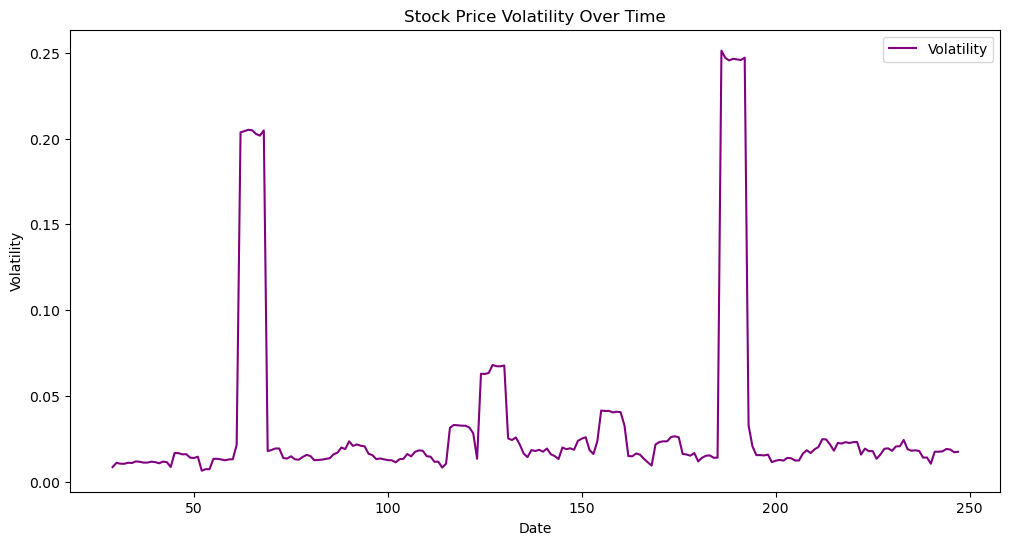

In [20]:
# Plot stock volatility over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='Volatility', color='purple')
plt.title("Stock Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

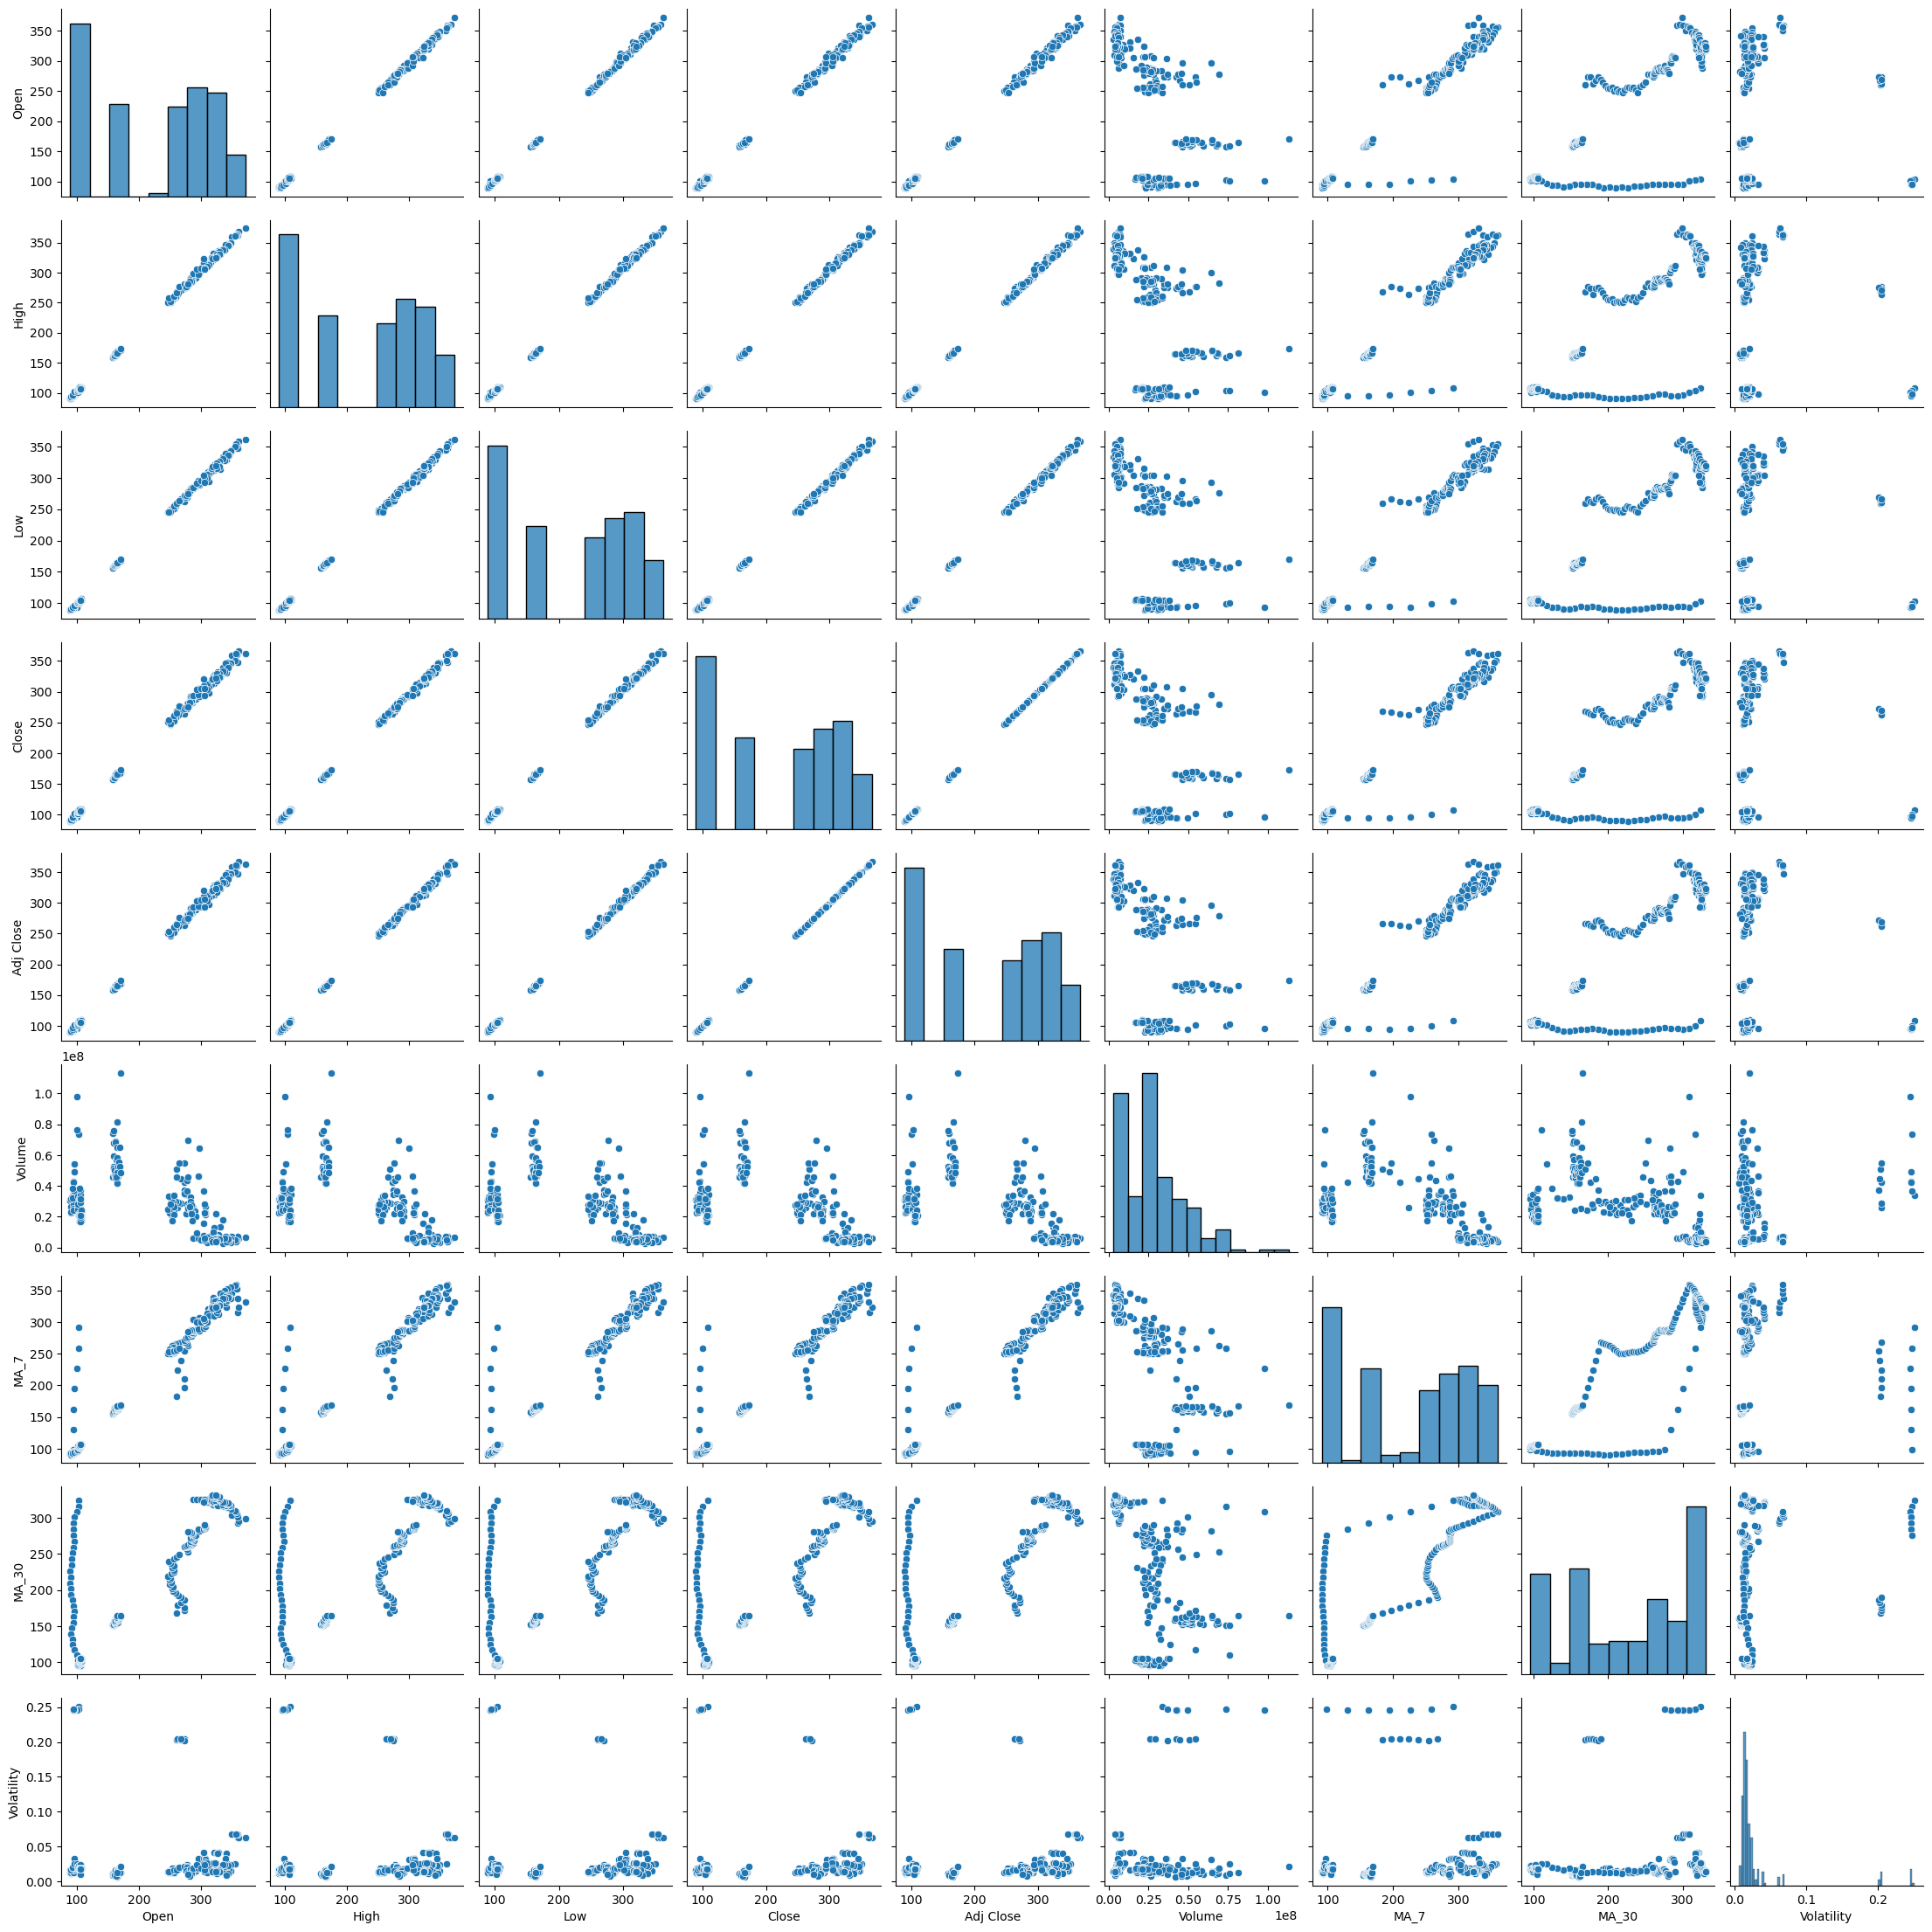

In [21]:
#creating pairplot for multivariate analysis
sns.pairplot(df)
plt.show()

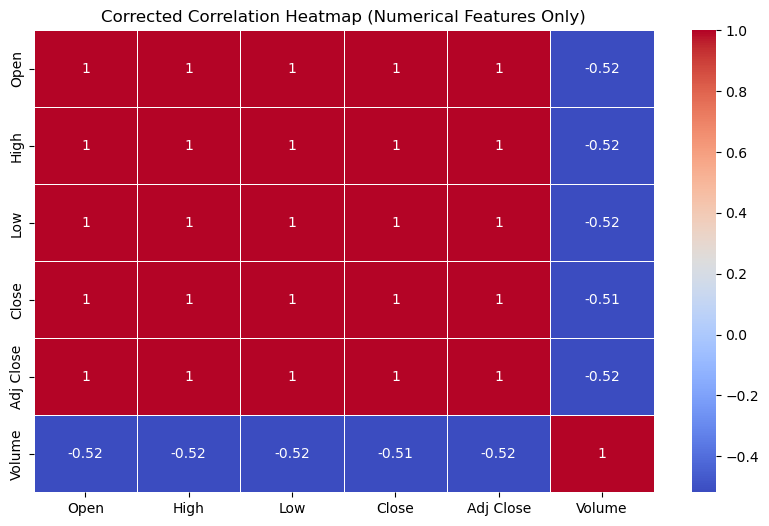

In [22]:
# Compute correlation only for numerical columns using heatmap
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Corrected Correlation Heatmap (Numerical Features Only)")
plt.show()

# Model Building


 Performance for Random Forest:
Train R²: 0.9643, Test R²: 0.9654, Cross-Validation R²: 0.9122
RMSE: 18.2328

 Performance for XGBoost:
Train R²: 0.9821, Test R²: 0.9742, Cross-Validation R²: 0.9674
RMSE: 15.7497


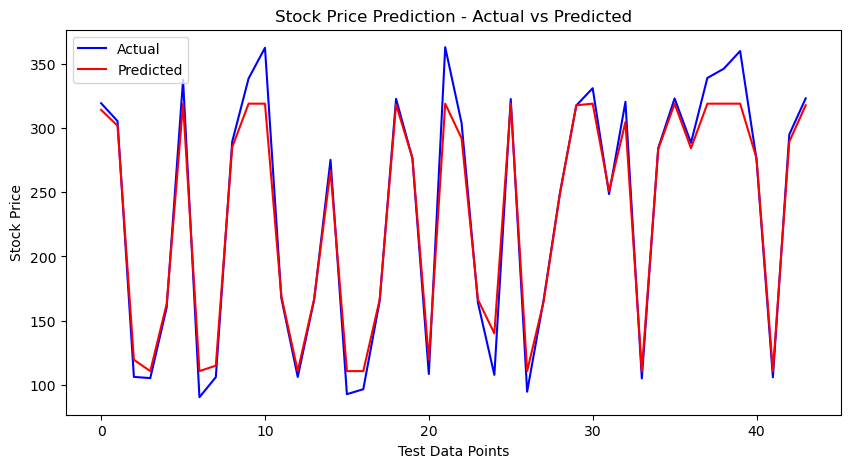

In [23]:
# Model Selection and evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30', 'Volatility']
X = df[features]
y = df['Close']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestRegressor(
    n_estimators=30, max_depth=3, min_samples_split=50, min_samples_leaf=20, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=250,  
    learning_rate=0.013,  
    max_depth=2,  
    min_child_weight=27,  
    reg_alpha=18,  
    reg_lambda=16,  
    gamma=8,
    subsample=0.87,  
    colsample_bytree=0.6  
)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)
with open("xgboost.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
with open("scaler.pkl", "wb") as f: 
    pickle.dump(scaler, f)
# Cross-Validation Scores
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='r2')
cv_xgb = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='r2')

# Model Evaluation Function
def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, cv_scores, model_name):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"\n Performance for {model_name}:")
    print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}, Cross-Validation R²: {np.mean(cv_scores):.4f}")
    print(f"RMSE: {rmse:.4f}")

# Evaluate Random Forest
evaluate_model(y_train, y_test, y_pred_rf_train, y_pred_rf, cv_rf, "Random Forest")

# Evaluate XGBoost
evaluate_model(y_train, y_test, y_pred_xgb_train, y_pred_xgb, cv_xgb, "XGBoost")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='Predicted', color='red')
plt.title('Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


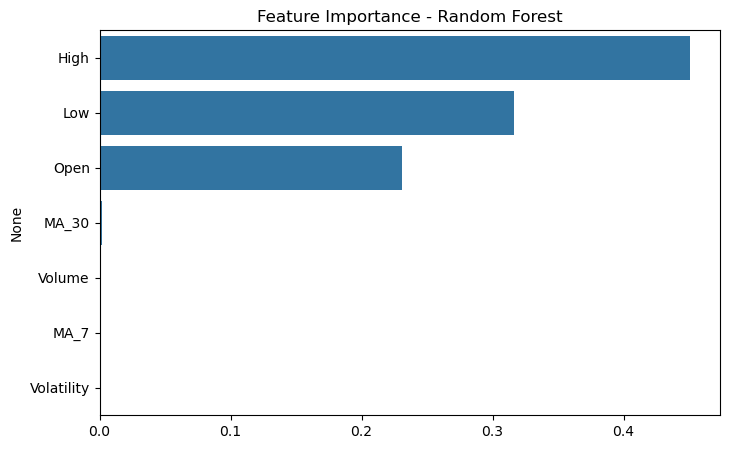

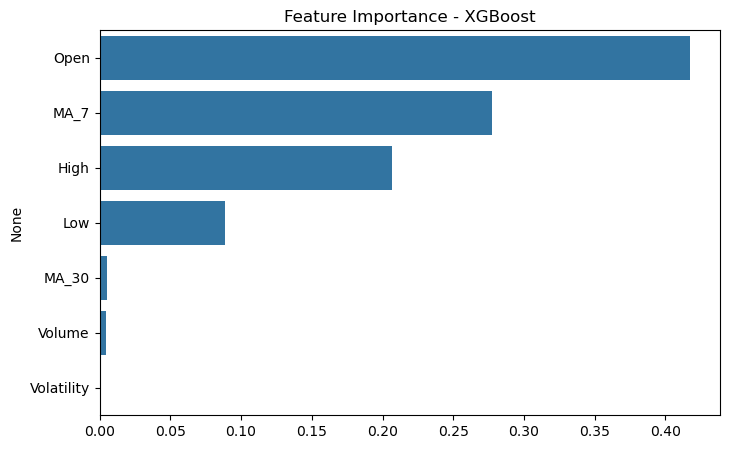

In [24]:
# Feature Importance - Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# Feature Importance - XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index)
    plt.title("Feature Importance - XGBoost")
    plt.show()
else:
    print("XGBoost model has no feature_importances_ attribute! Check if the model trained correctly.")

In [25]:
# Sample Input for prediction
sample_input = np.array([[159.300003, 162.139999, 157.809998, 75701800, 155.848572, 151.744000, 0.010931]])
sample_df = pd.DataFrame(sample_input, columns=features)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
sample_scaled = scaler.transform(sample_df)  
predicted_price_xgb = xgb_model.predict(sample_scaled)[0]
predicted_price_rf = rf_model.predict(sample_scaled)[0]

# Printing prediction Predictions
print(f"Predicted Stock Price (XGBoost): {predicted_price_xgb:.2f}")
print(f"Predicted Stock Price (Random Forest): {predicted_price_rf:.2f}")

Predicted Stock Price (XGBoost): 162.53
Predicted Stock Price (Random Forest): 137.52
